In [1]:
print("en esta version funcionaba bien deeplab parece")
#https://github.com/victorbug/20220211_lucasbeyer_pydensecrf/blob/840cff07567ff83e834a3149aeeda8f2dd2a5e1c/pydensecrf/examples/Non_RGB_Example_expatosFluorescentes_clases2.ipynb
print("Ojo con GPU no funciona esto en mi PC, el val_loss da cero")

en esta version funcionaba bien deeplab parece
Ojo con GPU no funciona esto en mi PC, el val_loss da cero


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_3778340/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
import import_ipynb
import tensorflow as tf
import numpy as np
from PIL import Image
import os
from scipy.io import loadmat #para el colormap

In [4]:
from glob import glob

In [5]:
from A20220911_DeeplabVBS import class_DeepLab as CDLAB

importing Jupyter notebook from A20220911_DeeplabVBS.ipynb


In [6]:
from A20220911_CRFVBS import class_CRF_OutputDatoseImagen as CCRF

importing Jupyter notebook from A20220911_CRFVBS.ipynb
importing Jupyter notebook from A20220911_UtilidadesVBS.ipynb


In [7]:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1" #Si usa la GPU, tira malos resultados con el val_loss accuracy 

In [8]:
!python --version

/bin/bash: python: command not found


In [9]:
!pip freeze

absl-py==1.2.0
alembic==1.8.1
anyio==3.6.1
apturl==0.5.2
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.0.5
astunparse==1.6.3
async-generator==1.10
attrs==22.1.0
Babel==2.10.3
backcall==0.2.0
bcrypt==3.1.7
beautifulsoup4==4.11.1
bleach==5.0.1
blinker==1.4
Brlapi==0.7.0
cachetools==5.2.0
certifi==2019.11.28
certipy==0.1.3
cffi==1.15.1
chardet==3.0.4
Click==7.0
colorama==0.4.3
command-not-found==0.3
cryptography==37.0.4
cupshelpers==1.0
cycler==0.11.0
dbus-python==1.2.16
debugpy==1.6.2
decorator==5.1.1
defer==1.0.6
defusedxml==0.7.1
distro==1.4.0
distro-info===0.23ubuntu1
duplicity==0.8.12.0
entrypoints==0.3
et-xmlfile==1.1.0
executing==0.9.1
fasteners==0.14.1
fastjsonschema==2.16.1
filelock==3.8.0
flatbuffers==1.12
fonttools==4.36.0
future==0.18.2
gast==0.4.0
gdown==4.5.3
google-auth==2.10.0
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
greenlet==1.1.2
grpcio==1.47.0
h5py==3.7.0
httplib2==0.14.0
idna==2.8
imageio==2.21.1
import-ipynb==0.1.4
importlib-metadata==4.12.0
im

In [10]:
!pwd

/home/vbugueno/Models/20220211_lucasbeyer_pydensecrf/pydensecrf/examples


In [11]:
#import numpy as np
#x = np.arange(20).reshape((4,5))
#np.savetxt('test.txt', x)

In [12]:
#func_PipelineDeeplabMasCRF3()

In [13]:
if False:
    from os.path import exists

    file_exists= exists(r'./COLAB_instance-level-human-parsing2/embrion/secuencia/raw/embryoR-10000.png')
    file_exists

In [14]:
#import glob
#archivos=(glob.glob(r"/home/vicbr2/Documents/vicbr2/Tesis/Modelos/20220211_lucasbeyer_pydensecrf/pydensecrf/examples/COLAB_instance-level-human-parsing2/embrion/secuencia/label/*"))
#archivos
#for i in archivos:
#    img_rawIM=np.array(Image.open(i))
#    img_rawIM
#    print(np.unique(img_rawIM))

In [15]:
if False:
    new_model = tf.keras.models.load_model('saved_model/model_func_PipelineDeeplabMasCRF')
    #new_model = tf.keras.models.load_model('saved_model/my_model4')

    pathMio="./COLAB_instance-level-human-parsing2/embrion/secuencia/raw/embryoR-10000.png"
        #auxIM = PIL.Image.open("./COLAB_instance-level-human-parsing2/Raw0.jpg")
        #pathMio=pathMio2

    print("OJO ESTA LINEA ES IMPORTANTE (LA DE ABAJO)")
    auxIM = tf.keras.utils.load_img(
        pathMio, target_size=(496, 496)
    )

    aux = tf.keras.utils.img_to_array(auxIM)
    aux = tf.expand_dims(aux, 0) # Create a batch

    DCNNProbmapIn=new_model.predict(aux)
    DCNNProbmapIn=DCNNProbmapIn[0,:,:,:]


    if True: #Para guardar imagenes     
        arr1=DCNNProbmapIn[:,:,0]#La clase background
        arr1=(arr1-np.min(arr1))/(np.max(arr1)-np.min(arr1))
        print("np.unique(arr1)",np.unique(arr1))

        arr2=DCNNProbmapIn[:,:,1]#La clase embrion
        arr2=(arr2-np.min(arr2))/(np.max(arr2)-np.min(arr2))
        print("np.unique(arr2)",np.unique(arr2))

        DCNNProbmapIn_im1 = Image.fromarray((arr1* 255).astype(np.uint8))
        DCNNProbmapIn_im1.save("4Probmap0.png")

        DCNNProbmapIn_im2 = Image.fromarray((arr2* 255).astype(np.uint8))
        DCNNProbmapIn_im2.save("4Probmap1.png")


In [16]:
def func_Pipeline_GenerarMapaPaper1():

    #lst_config=['C1RawC2SobelxC3Sobely',"C1AnguloC2AnguloC3Angulo", "C1AnguloC20C30", "C1AnguloC2RawC30"]#,"C1RawC2AnguloC30"]
    #lst_config=['C1RC2SobelxC3Sobely',"C1AnguloC2AnguloC3Angulo", "C1AnguloC20C30", "C1AnguloC2RawC30","C1RawC2AnguloC30",'C1RC2GC3B','C1RC2GC3B_2']
    #lst_pairwisebilateralCompat=[1,10,20,50]
    from datetime import datetime as dt  
    str_fecha=dt.today().strftime('%Y%m%d_%H%M')
    lst_pairwisebilateralCompat=[1,10]

    lst_ParametroXY=[]
    #for x in range(1, 102, 10):
    for x in range(1, 202, 1):
        lst_ParametroXY.append((x,x))

    lst_ParametroRGB=[]
    #for x in range(1, 22,5):
    for x in range(1, 52,1):
        lst_ParametroRGB.append((x,x,x))

    lst_imagenUsar=["usarMSRC", "usarEmbrion2Clases"]
    from datetime import datetime as dt
    nombreArchivoIn=dt.today().strftime('%Y%m%d_%H%M')+"pipeline.csv"

    #for lst_pairwisebilateralCompat_i in lst_pairwisebilateralCompat:
    for lst_imagenUsar_i in lst_imagenUsar:
        for ParametroXY_i in lst_ParametroXY:
            for ParametroRGB_i in lst_ParametroRGB:
                objeto_class_class_CRF_OutputDatoseImagen=CCRF()
                objeto_class_class_CRF_OutputDatoseImagen=objeto_class_class_CRF_OutputDatoseImagen(imagenUsar=lst_imagenUsar_i, 
                                             nombrearchivoIn=nombreArchivoIn, 
                                             MetodoRGBslots="MetodoRGBslots_original", 
                                             elegirRGBslots="elegirRGBslots_original", 
                                             influirSobelEnSmothnessKernel=False, 
                                             ParametroXY=ParametroXY_i, 
                                             ParametroRGB=ParametroRGB_i, 
                                             probabilidades={"int_CC":0.7,"int_CI":0.3,"int_IC":0.45,"int_II":0.55}, 
                                             umbralFiltro="SinUmbral", 
                                             metodoConv=True, 
                                             k_conv=10, 
                                             metodoFranjas=False, 
                                             nfranjasRow=0, 
                                             nfranjasCol=0, 
                                             grosorFranja=0,
                                             metodoErosionar=False,
                                             kernelErosionar=2, 
                                             int_erosionIteraciones=1,
                                             inference=10,
                                             pairwisebilateralCompat=10,
                                             metodoDilatar=True,
                                             probmapTipo="probmapgeneradoOriginal",
                                             DCNNProbmap="ASASDASD",#En esta config, no recibe probmap, se le crea uno, por eso se le pone cualquier cosa
                                             fecha=str_fecha
                                            )


    import pandas as pd
    #20220612_1924_event
    #20220612_2155_event
    #20220613_0212_event
    #20220616_0141_event
    namearchivo=nombreArchivoIn
    #df=pd.read_csv(r"outputsMasivos/"+namearchivo+r".csv", header=0, comment='#')
    df=pd.read_csv(r"outputsMasivos/"+nombreArchivoIn, header=0, comment='#')
    #df.columns=['miou', 'configuracion', 'umbral', 'sxy', 'srgb', 'metodo', 'probmap', 'influirSobelEnSmothnessKernel']

    #df
    #if True:



    df = df.sort_values(by=["miou"], ascending=[False] )
    df = df.reset_index(drop=True)


    df["sxy1d"] = df["ParametroXY"].str.extract('(?<=\()(.*?)(?=\,)').astype(int)
    df["srgb1d"] = df["ParametroRGB"].str.extract('(?<=\()(.*?)(?=\,)').astype(int)


    print("Esto es para mostrar el mapa obtenido")
    dfMSRC=df[df["imagenUsar"]=="usarMSRC"]
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure

    figure(figsize=(8, 6), dpi=80)
    plt.title(namearchivo)
    plt.scatter(dfMSRC["sxy1d"] , dfMSRC["srgb1d"] , c=dfMSRC["miou"],cmap="jet" )
    plt.colorbar()
    plt.show()

    dfMSRC
    
    print("Esto es para mostrar el mapa obtenido con un zoom")
    dfMSRCZoom=dfMSRC[dfMSRC["miou"]>=0.9]
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure

    figure(figsize=(8, 6), dpi=80)
    plt.title(namearchivo)
    plt.scatter(dfMSRCZoom["sxy1d"] , dfMSRCZoom["srgb1d"] , c=dfMSRCZoom["miou"],cmap="jet" )
    plt.colorbar()
    plt.show()

    dfMSRCZoom
    
    print("Esto es para mostrar el mapa del paper. No es mas que cargar y mostrar la imagen que esta en este directorio")
    #from IPython.display import Image
    imagenPaperCRF=Image.open(r"graficoPaper.png")
    plt.imshow(imagenPaperCRF)

    #Image("graficoPaper.png")

    
    dfEmbrion=df[df["imagenUsar"]=="usarEmbrion2Clases"]
    import matplotlib.pyplot as plt
    from matplotlib.pyplot import figure

    figure(figsize=(8, 6), dpi=80)
    plt.title(namearchivo)
    plt.scatter(dfEmbrion["sxy1d"] , dfEmbrion["srgb1d"] , c=dfEmbrion["miou"],cmap="jet" )
    plt.colorbar()
    plt.show()
    print("Esto es para comparar el mapa con el de otro dataset para que se vea que no es casualidad el parecido")
    dfEmbrion
    


In [17]:
#func_Pipeline_GenerarMapaPaper1()

In [18]:
def func_Pipeline_GenerarMapaPaper_VariasConfigs2():

    #lst_config=['C1RawC2SobelxC3Sobely',"C1AnguloC2AnguloC3Angulo", "C1AnguloC20C30", "C1AnguloC2RawC30"]#,"C1RawC2AnguloC30"]
    #lst_config=['C1RC2SobelxC3Sobely',"C1AnguloC2AnguloC3Angulo", "C1AnguloC20C30", "C1AnguloC2RawC30","C1RawC2AnguloC30",'C1RC2GC3B','C1RC2GC3B_2']
    #lst_pairwisebilateralCompat=[1,10,20,50]
    
    from datetime import datetime as dt  
    str_fecha=dt.today().strftime('%Y%m%d_%H%M')
    print(str_fecha)
    
    lst_pairwisebilateralCompat=[1,10]

    lst_ParametroXY=[]
    #for x in range(1, 102, 10):
    for x in range(1, 202, 1):
    #for x in range(1, 2, 1):
        lst_ParametroXY.append((x,x))

    lst_ParametroRGB=[]
    #for x in range(1, 22,5):
    for x in range(1, 52,1):
    #for x in range(1, 2,1):
        lst_ParametroRGB.append((x,x,x))

    lst_imagenUsar=["usarEmbrion2Clases"]
    
    #lst_configuraciones=["C1RawC2RawC3Raw", "C1RawC2RawC3Angulo", "C1RawC2RawC30", "C1RawC20C30", "C10C2RawC30", "C10C20C3Raw",
    #                     "C1AnguloC2AnguloC3Angulo", "C1AnguloC2AnguloC3Raw", "C1AnguloC2AnguloC30", "C1AnguloC20C30", "C10C2AnguloC30", "C10C20C3Angulo",
    #                     "C1AnguloC2RawC30", "C1RawC2AnguloC30", "C1RawC20C3Angulo", "C1AnguloC20C3Raw"]
      
    if True:  
        lst_configuraciones=["C1RC2GC3B", "C1RC2GC3B_2",
                             "C1RawC2SobelxC3Sobely", "C1RawC2SobelyC3Sobelx", "C1SobelxC2RawC3Sobely", "C1SobelxC2SobelyC3Raw", "C1SobelyC2SobelxC3Raw", "C1SobelyC2RawC3Sobelx",
                             "C1AnguloC2SobelxC3Sobely", "C1AnguloC2SobelyC3Sobelx", "C1SobelxC2AnguloC3Sobely", "C1SobelxC2SobelyC3Angulo", "C1SobelyC2SobelxC3Angulo", "C1SobelyC2AnguloC3Sobelx",

                             "C1RawC2RawC3Raw",
                             "C1RawC2RawC3Angulo",
                             "C1RawC2RawC30",
                             
                             "C1RawC2AnguloC3Raw",
                             "C1RawC2AnguloC3Angulo",
                             "C1RawC2AnguloC30",
                             
                             "C1RawC20C3Raw",
                             "C1RawC20C3Angulo",
                             "C1RawC20C30",
                             
                             "C1AnguloC2RawC3Raw",
                             "C1AnguloC2RawC3Angulo",
                             "C1AnguloC2RawC30",
                             
                             "C1AnguloC2AnguloC3Raw",
                             "C1AnguloC2AnguloC3Angulo",
                             "C1AnguloC2AnguloC30",
                             
                             "C1AnguloC20C3Raw",
                             "C1AnguloC20C3Angulo",
                             "C1AnguloC20C30",
                             
                             "C10C2RawC3Raw",
                             "C10C2RawC3Angulo",
                             "C10C2RawC30",
                             
                             "C10C2AnguloC3Raw",
                             "C10C2AnguloC3Angulo",
                             "C10C2AnguloC30",
                             
                             "C10C20C3Raw",
                             "C10C20C3Angulo"
                             #"C10C20C30"
                             ]
    
    
    #lst_configuraciones=["C1AnguloC2RawC30"]
    
    #lst_configuraciones=["C1AnguloC20C30", "C10C2AnguloC30", "C10C20C3Angulo",
    #                         "C1AnguloC2RawC30", "C1RawC2AnguloC30", "C1RawC20C3Angulo", "C1AnguloC20C3Raw"]
             

    from datetime import datetime as dt
    nombreArchivoIn=dt.today().strftime('%Y%m%d_%H%M')+"pipeline.csv"
    print(nombreArchivoIn)
    
    for lst_configuraciones_i in lst_configuraciones:
        print(r"configuracion: ",lst_configuraciones_i)
        print("agregar aca que lleva x de las y configuraciones")
        for lst_imagenUsar_i in lst_imagenUsar:
            for ParametroXY_i in lst_ParametroXY:
                for ParametroRGB_i in lst_ParametroRGB:
                    objeto_class_class_CRF_OutputDatoseImagen=CCRF()
                    objeto_class_class_CRF_OutputDatoseImagen=objeto_class_class_CRF_OutputDatoseImagen(imagenUsar=lst_imagenUsar_i, 
                                                 nombrearchivoIn=nombreArchivoIn, 
                                                 MetodoRGBslots="MetodoRGBslots_nuevo", 
                                                 elegirRGBslots=lst_configuraciones_i, 
                                                 influirSobelEnSmothnessKernel=False, 
                                                 ParametroXY=ParametroXY_i, 
                                                 ParametroRGB=ParametroRGB_i, 
                                                 probabilidades={"int_CC":0.7,"int_CI":0.3,"int_IC":0.45,"int_II":0.55}, 
                                                 umbralFiltro="SinUmbral", 
                                                 metodoConv=True, 
                                                 k_conv=10, 
                                                                                                        
                                                 metodoFranjas=False, 
                                                 nfranjasRow=0, 
                                                 nfranjasCol=0, 
                                                 grosorFranja=0,
                                                                                                        
                                                 metodoErosionar=False,
                                                 kernelErosionar=2, 
                                                 int_erosionIteraciones=0,
                                                                                                        
                                                 inference=10,
                                                 pairwisebilateralCompat=10,
                                                 metodoDilatar=False,
                                                 probmapTipo="probmapgeneradoOriginal",
                                                 DCNNProbmap="ASASDASD", #En esta config, no recibe probmap, se le crea uno, por eso se le pone cualquier cosa
                                                 fecha=str_fecha
                                                )
        
        
    def func_visualizar():
        import pandas as pd
        import numpy as np
        #namearchivo="20220925_0339pipeline"
        df=pd.read_csv(r"outputsMasivos/"+nombreArchivoIn, header=0, comment='#')
        df = df.sort_values(by=["miou"], ascending=[False] )
                                         
        lst_configuraciones=np.unique(df["elegirRGBslots"]).tolist()
        print(lst_configuraciones)    
        
        dfaux=df.copy()

        print(pd.DataFrame((df.groupby("elegirRGBslots")["miou"].max())).reset_index().sort_values(by=['miou'], ascending=False))

        for config_i in lst_configuraciones:

            dfaux = df[df["elegirRGBslots"]==config_i]
            print(dfaux.head(1)[["miou"]] )

            dfaux = dfaux.reset_index(drop=True)


            dfaux["sxy1d"] = dfaux["ParametroXY"].str.extract('(?<=\()(.*?)(?=\,)').astype(int)
            dfaux["srgb1d"] = dfaux["ParametroRGB"].str.extract('(?<=\()(.*?)(?=\,)').astype(int)



            import matplotlib.pyplot as plt
            from matplotlib.pyplot import figure
            figure(figsize=(8, 6), dpi=80)
            plt.title(config_i)
            plt.scatter(dfaux["sxy1d"] , dfaux["srgb1d"] , c=dfaux["miou"],cmap="jet" )
            plt.colorbar()
            plt.show()
            
    func_visualizar()

In [19]:
#func_Pipeline_GenerarMapaPaper_VariasConfigs2()

In [20]:
def func_PipelineDeeplabMasCRF3():
    
    from datetime import datetime as dt    
    str_fecha=dt.today().strftime('%Y%m%d_%H%M')
    print("Fecha inicio: ",str_fecha)
    
    print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))
    objeto_class_DeepLab=CDLAB()
    #objeto_class_DeepLab=objeto_class_DeepLab(image_sizeIn=496, 
    #                              batch_sizeIn=1, 
    #                              num_classesIn=2, 
    #                              data_dirIn="./COLAB_instance-level-human-parsing2/embrion/secuencia", 
    #                              num_train_imagesIn=120, 
    #                              num_val_imagesIn=10, 
    #                              num_test_imagesIn=10, 
    #                              epocasIn=2)

    
    
    image_sizeIn1=1024
    batch_sizeIn1=3
    num_classesIn1=2
    #data_dirIn1=r"./COLAB_instance-level-human-parsing2/embrion/secuencia"
    data_dirIn1=r"./COLAB_instance-level-human-parsing2/embryoDataset"
    num_train_imagesIn1=900
    num_val_imagesIn1=100
    num_test_imagesIn1=100 
    epocasIn1=100#200 es el ideal
                
    str_prefijoModel="embrion"+"B"+str(batch_sizeIn1)+"NC"+str(num_classesIn1)+"Tra"+str(num_train_imagesIn1)+"Val"+str(num_val_imagesIn1)+"Tes"+str(num_test_imagesIn1)+"Epo"+str(epocasIn1)
    
    DATA_DIR="./COLAB_instance-level-human-parsing2/instance-level_human_parsing/instance-level_human_parsing/Training"
    test_images = sorted(glob(os.path.join(DATA_DIR, r"video_animal2_proyeccion_SeqDA/*")))[
              1+ num_train_imagesIn1+ num_val_imagesIn1 : 1+ num_train_imagesIn1+ num_val_imagesIn1 + num_test_imagesIn1
            ]
    test_masks = sorted(glob(os.path.join(DATA_DIR, r"EVLstack_SeqDA/*")))[
              1+ num_train_imagesIn1+ num_val_imagesIn1 : 1+ num_train_imagesIn1+ num_val_imagesIn1 + num_test_imagesIn1
            ]
    
    
    primeraparte_DCNN=True
    mediaparte2=True
    segundaparte_CRF=True
    
    
    if (primeraparte_DCNN):
        objeto_class_DeepLab(image_sizeIn=image_sizeIn1, 
                             batch_sizeIn=batch_sizeIn1, 
                             num_classesIn=num_classesIn1,
                             data_dirIn=data_dirIn1,
                             num_train_imagesIn=num_train_imagesIn1, 
                             num_val_imagesIn=num_val_imagesIn1, 
                             num_test_imagesIn=num_test_imagesIn1, 
                             epocasIn=epocasIn1)

        #if True:
        #new_model = tf.keras.models.load_model('saved_model/my_model4')
        new_model=objeto_class_DeepLab.model
        #return(new_model)
        #new_model = tf.keras.models.load_model('saved_model/model_func_PipelineDeeplabMasCRF')
        #new_model = tf.keras.models.load_model('saved_model/my_model4')
        

        #new_model.save('saved_models/'+str_fecha+"func_PipelineDeeplabMasCRF"+str_prefijoModel)
        
        
        
        #if (embrion==False):          
        print(r"objeto_class_DeepLab.lst_predsSinArgmax0: ", objeto_class_DeepLab.lst_predsSinArgmax0)
        
    if (mediaparte2):        
 
        
        #import PIL
        #pathMio="./COLAB_instance-level-human-parsing2/embrion/secuencia/label/embryoG-10000.png"
        #pathMio=r"./COLAB_instance-level-human-parsing2/embrion/secuencia/raw/embryoR-10000.jpg"#Esta es solo para dibujar los probmaps puntuales para tener un feeling mejor del proceso
        pathMio=r"./COLAB_instance-level-human-parsing2/embryoDataset/video_animal2_proyeccion_SeqDA/1OR0000.jpg"#Esta es solo para dibujar los probmaps puntuales para tener un feeling mejor del proceso
        
        #impathMio=Image.open(pathMio)
        #impathMio.show()
        #from os.path import exists
        #print(r"exists:?",exists(pathMio))
        
        
        #auxIM = PIL.Image.open("./COLAB_instance-level-human-parsing2/Raw0.jpg")
        #pathMio=pathMio2
        #exists(r'./COLAB_instance-level-human-parsing2/embrion/secuencia/raw/embryoR-10000.png')
        
        if False:
            print("OJO ESTA LINEA ES IMPORTANTE (LA DE ABAJO)")
            auxIM = tf.keras.utils.load_img(
                pathMio, target_size=(496, 496)
            )

            aux = tf.keras.utils.img_to_array(auxIM)
            aux = tf.expand_dims(aux, 0) # Create a batch

            #ACA PREDICE
            DCNNProbmapIn=new_model.predict(aux)

        DCNNProbmapIn=objeto_class_DeepLab.lst_predsSinArgmax0[0,:,:,:]

        
        

        #if True: #Para guardar imagenes     
        
        arr1A=DCNNProbmapIn[:,:,0]#La clase background
        arr2A=DCNNProbmapIn[:,:,1]#La clase embrion
        
        #print("type(arr1A)",type(arr1A))
        #print("arr1A.shape",arr1A.shape)
        #print("type(arr2A)",type(arr2A))
        #print("arr2A.shape",arr2A.shape)
        
        #arr1A=arr1A/(arr1A+arr2A)
        #arr2A=arr2A/(arr1A+arr2A)
        
        #print("type(arr1A):", type(arr1A))
        #print("type(arr2A):", type(arr2A))
        
        #print("(arr1A.shape):", arr1A.shape)
        #print("(arr1A.shape):", arr1A.shape)
        
        #print("arr1A:", arr1A)
        #print("arr2A:", arr2A)
        
                
        #print("np.unique(arr1)",np.unique(arr1))
        #arr1=(arr1A-np.min(arr1A))/(np.max(arr1A)-np.min(arr1A))#Si se saca esta linea queda como tv analogica sin señal

        
        #print("np.unique(arr2)",np.unique(arr2))
        #arr2=(arr2A-np.min(arr2A))/(np.max(arr2A)-np.min(arr2A))#Si se saca esta linea queda como tv analogica sin señal

        #DCNNProbmapIn_im1 = Image.fromarray((arr1* 255).astype(np.uint8))
        #DCNNProbmapIn_im1.save(r"outputsMasivos/ImagenesTemporales/4Probmap0"+str_fecha+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".png")

        #DCNNProbmapIn_im2 = Image.fromarray((arr2* 255).astype(np.uint8))
        #DCNNProbmapIn_im2.save(r"outputsMasivos/ImagenesTemporales/4Probmap1"+str_fecha+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".png")

        pathProbmap=r"outputsMasivos/ImagenesTemporales/"+str_fecha+"Probmaps"+"/"
        #os.mkdir(r"outputsMasivos/ImagenesTemporales/"+str_fecha+"Probmaps"+"/")
        os.mkdir(pathProbmap)
        
        
        #print("arr1A", arr1A)
        #print("arr2A", arr2A)
        #DCNNProbmapIn_im1 = Image.fromarray((arr1* 255).astype(np.uint8))
        DCNNProbmapIn_im1 = Image.fromarray((arr1A*255).astype(np.uint8))
        DCNNProbmapIn_im1.save(pathProbmap+"4Probmap0"+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".png")

        #DCNNProbmapIn_im2 = Image.fromarray((arr2* 255).astype(np.uint8))
        DCNNProbmapIn_im2 = Image.fromarray((arr2A*255).astype(np.uint8))
        DCNNProbmapIn_im2.save(pathProbmap+"4Probmap1"+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".png")

        
        np.savetxt((pathProbmap+"4Probmap0"+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".txt"), arr1A,fmt='%.2f', delimiter=',', newline='\n')
        np.savetxt((pathProbmap+"4Probmap1"+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".txt"), arr2A,fmt='%.2f', delimiter=',', newline='\n')
        #with open(r"outputsMasivos/ImagenesTemporales/"+str_fecha+"/4Probmap0"+str_fecha+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".txt",'wb') as f:
        #with open(pathProbmap+"4Probmap0"+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".txt",'wb') as f:
            
            #for line in (arr1A):
                #np.savetxt(f, line, fmt='%.2f', delimiter=',', newline='\n')
                #np.savetxt(f, line)
                
        #with open(r"outputsMasivos/ImagenesTemporales/"+str_fecha+"/4Probmap1"+str_fecha+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".txt",'wb') as f:
        #with open(pathProbmap+"4Probmap1"+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".txt",'wb') as f:
        #    for line in (arr2A):
        #        np.savetxt(f, line, fmt='%.2f', delimiter=',', newline='\n')
        
        
        
        
    
    if (segundaparte_CRF):
        #lst_config=['C1RawC2SobelxC3Sobely',"C1AnguloC2AnguloC3Angulo", "C1AnguloC20C30", "C1AnguloC2RawC30"]#,"C1RawC2AnguloC30"]
        
        if True:
            lst_config=["C1RawC2SobelxC3Sobely",
                        "C1AnguloC2RawC3Raw",
                        "C1AnguloC2RawC3Angulo",
                        "C1AnguloC2SobelxC3Sobely",
                        "C1AnguloC20C3Raw",
                        "C1AnguloC2AnguloC3Angulo",
                        "C1AnguloC2AnguloC30",
                        "C10C2AnguloC30",
                        "C1RawC2RawC3Raw",
                        "C10C2RawC3Raw",
                        "C10C2RawC30",
                       ]
        len_configs=len(lst_config)
        len_configs_i=1
        #lst_config=["C1RawC2SobelxC3Sobely"]
        #lst_config=['C1RC2SobelxC3Sobely',"C1AnguloC2AnguloC3Angulo", "C1AnguloC20C30", "C1AnguloC2RawC30","C1RawC2AnguloC30",'C1RC2GC3B','C1RC2GC3B_2']
        #lst_pairwisebilateralCompat=[1,10,20,50]

        #lst_pairwisebilateralCompat=[10]

        lst_ParametroXY=[]
        for x in range(1, 20, 1):
        #for x in range(1, 102, 10):
        #for x in range(1, 202, 1):
            lst_ParametroXY.append((x,x))

        lst_ParametroRGB=[]
        for x in range(1, 20, 1):
        #for x in range(1, 22,5):
        #for x in range(1, 42,1):

            lst_ParametroRGB.append((x,x,x))


        nombreArchivoIn=str_fecha+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".csv"
        print(nombreArchivoIn)

        #for lst_pairwisebilateralCompat_i in lst_pairwisebilateralCompat:
        for lst_config_i in lst_config:
            print("Config ", str(len_configs_i), "de ", str(len_configs))
            print(lst_config_i)            
            for ParametroXY_i in lst_ParametroXY:
                for ParametroRGB_i in lst_ParametroRGB:
                    objeto_class_class_CRF_OutputDatoseImagen=CCRF()
                    objeto_class_class_CRF_OutputDatoseImagen(imagenUsar="usarEmbrion2Clases", 
                                                 nombrearchivoIn=nombreArchivoIn, 
                                                 MetodoRGBslots="MetodoRGBslots_nuevo", 
                                                 elegirRGBslots=lst_config_i, 
                                                 influirSobelEnSmothnessKernel=False, 
                                                 ParametroXY=ParametroXY_i, 
                                                 ParametroRGB=ParametroRGB_i, 
                                                 probabilidades={"int_CC":0.7,"int_CI":0.3,"int_IC":0.45,"int_II":0.55}, 
                                                 umbralFiltro="SinUmbral", 
                                                 metodoConv=False, 
                                                 k_conv=1, 
                                                 metodoFranjas=False, 
                                                 nfranjasRow=0, 
                                                 nfranjasCol=0, 
                                                 grosorFranja=0,
                                                 metodoErosionar=False,
                                                 kernelErosionar=2, 
                                                 int_erosionIteraciones=1,
                                                 inference=100,
                                                 pairwisebilateralCompat=10,
                                                 metodoDilatar=False,
                                                 probmapTipo="probmapDesdeDCNN",
                                                 DCNNProbmap=DCNNProbmapIn,
                                                 fecha=str_fecha
                                                )
                    len_configs_i=len_configs_i+1

                
        #Lo que sigue es para sacar el unary que necesita compat=0. Se itera sobre pocos Xy y RGB y algunas config para estar seguros. Se hace uan iteracion mas corta
        #Lo que sigue es para sacar el unary que necesita compat=0. Se itera sobre pocos Xy y RGB y algunas config para estar seguros. Se hace uan iteracion mas corta
        #Lo que sigue es para sacar el unary que necesita compat=0. Se itera sobre pocos Xy y RGB y algunas config para estar seguros. Se hace uan iteracion mas corta
        #Lo que sigue es para sacar el unary que necesita compat=0. Se itera sobre pocos Xy y RGB y algunas config para estar seguros. Se hace uan iteracion mas corta
        
        if False:
            #MetodoRGBslots_original
            lst_ParametroXY=[]
            #for x in range(1, 102, 10):
            for x in range(1, 20, 1):
                lst_ParametroXY.append((x,x))

            lst_ParametroRGB=[]
            #for x in range(1, 22,5):
            for x in range(1, 20,1):
                lst_ParametroRGB.append((x,x,x))
        
        print("Config 1 de 1")
        print("elegirRGBslots_original")        
        for ParametroXY_i in lst_ParametroXY:
            for ParametroRGB_i in lst_ParametroRGB:
                objeto_class_class_CRF_OutputDatoseImagen2=CCRF()
                objeto_class_class_CRF_OutputDatoseImagen2(imagenUsar="usarEmbrion2Clases", 
                                             nombrearchivoIn=nombreArchivoIn, 
                                             MetodoRGBslots="MetodoRGBslots_original", 
                                             elegirRGBslots="elegirRGBslots_original", 
                                             influirSobelEnSmothnessKernel=False, 
                                             ParametroXY=ParametroXY_i, 
                                             ParametroRGB=ParametroRGB_i, 
                                             probabilidades={"int_CC":0.7,"int_CI":0.3,"int_IC":0.45,"int_II":0.55}, 
                                             umbralFiltro="SinUmbral", 
                                             metodoConv=False, 
                                             k_conv=1, 
                                             metodoFranjas=False, 
                                             nfranjasRow=0, 
                                             nfranjasCol=0, 
                                             grosorFranja=0,
                                             metodoErosionar=False,
                                             kernelErosionar=2, 
                                             int_erosionIteraciones=1,
                                             inference=100,
                                             pairwisebilateralCompat=0,#Esto es lo importante aqui
                                             metodoDilatar=False,
                                             probmapTipo="probmapDesdeDCNN",
                                             DCNNProbmap=DCNNProbmapIn,
                                             fecha =str_fecha
                                            )
                
        #Estas son las imagenes originales no mas
        lst_config=["C1RC2GC3B",
                    "C1RC2GC3B_2"
                   ]
        len_configs=len(lst_config)
        len_configs_i=1

        for lst_config_i in lst_config:  
            print("Config ", str(len_configs_i), "de ", str(len_configs))
            print(lst_config_i)            
            for ParametroXY_i in lst_ParametroXY:
                for ParametroRGB_i in lst_ParametroRGB:
                    objeto_class_class_CRF_OutputDatoseImagen2=CCRF()
                    objeto_class_class_CRF_OutputDatoseImagen2(imagenUsar="usarEmbrion2Clases", 
                                                 nombrearchivoIn=nombreArchivoIn, 
                                                 MetodoRGBslots="MetodoRGBslots_nuevo", 
                                                 elegirRGBslots=lst_config_i, 
                                                 influirSobelEnSmothnessKernel=False, 
                                                 ParametroXY=ParametroXY_i, 
                                                 ParametroRGB=ParametroRGB_i, 
                                                 probabilidades={"int_CC":0.7,"int_CI":0.3,"int_IC":0.45,"int_II":0.55}, 
                                                 umbralFiltro="SinUmbral", 
                                                 metodoConv=False, 
                                                 k_conv=1, 
                                                 metodoFranjas=False, 
                                                 nfranjasRow=0, 
                                                 nfranjasCol=0, 
                                                 grosorFranja=0,
                                                 metodoErosionar=False,
                                                 kernelErosionar=2, 
                                                 int_erosionIteraciones=1,
                                                 inference=100,
                                                 pairwisebilateralCompat=0,#Esto es lo importante aqui
                                                 metodoDilatar=False,
                                                 probmapTipo="probmapDesdeDCNN",
                                                 DCNNProbmap=DCNNProbmapIn,
                                                 fecha=str_fecha
                                                )
                    len_configs_i=len_configs_i+1
                    
                    
                    
        def func_visualizar():
            import pandas as pd
            import numpy as np
            #namearchivo="20220925_0339pipeline"
            df=pd.read_csv(r"outputsMasivos/"+nombreArchivoIn, header=0, comment='#')
            df = df.sort_values(by=["miou"], ascending=[False] )

            lst_configuraciones=np.unique(df["elegirRGBslots"]).tolist()
            print(lst_configuraciones)    

            dfaux=df.copy()

            print(pd.DataFrame((df.groupby("elegirRGBslots")["miou"].max())).reset_index().sort_values(by=['miou'], ascending=False))

            for config_i in lst_configuraciones:

                dfaux = df[df["elegirRGBslots"]==config_i]
                print(dfaux.head(1)[["miou"]] )

                dfaux = dfaux.reset_index(drop=True)


                dfaux["sxy1d"] = dfaux["ParametroXY"].str.extract('(?<=\()(.*?)(?=\,)').astype(int)
                dfaux["srgb1d"] = dfaux["ParametroRGB"].str.extract('(?<=\()(.*?)(?=\,)').astype(int)



                import matplotlib.pyplot as plt
                from matplotlib.pyplot import figure
                figure(figsize=(8, 6), dpi=80)
                plt.title(config_i)
                plt.scatter(dfaux["sxy1d"] , dfaux["srgb1d"] , c=dfaux["miou"],cmap="jet" )
                plt.colorbar()
                plt.show()
            
        func_visualizar()
        str_fechaFin=dt.today().strftime('%Y%m%d_%H%M')
        print("Fecha inicio: ",str_fecha, "Fecha fin: ", str_fechaFin)

In [21]:
#plot_predictions(test_images[:4], colormap, model=model1)

In [22]:
#plot_predictions(test_images[:4], colormap, model=new_model)

Fecha inicio:  20221119_1340
Num GPUs Available:  1


2022-11-19 13:40:42.018895: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 13:40:42.038883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 13:40:42.039088: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-19 13:40:42.056762: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Train Dataset: <BatchDataset element_spec=(TensorSpec(shape=(3, 1024, 1024, 3), dtype=tf.float32, name=None), TensorSpec(shape=(3, 1024, 1024, 1), dtype=tf.float32, name=None))>
Val Dataset: <BatchDataset element_spec=(TensorSpec(shape=(3, 1024, 1024, 3), dtype=tf.float32, name=None), TensorSpec(shape=(3, 1024, 1024, 1), dtype=tf.float32, name=None))>
Test Dataset: <BatchDataset element_spec=(TensorSpec(shape=(3, 1024, 1024, 3), dtype=tf.float32, name=None), TensorSpec(shape=(3, 1024, 1024, 1), dtype=tf.float32, name=None))>
len(train_images) 900
len(val_images) 100
len(test_images) 100
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/100


2022-11-19 13:40:47.351582: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-11-19 13:40:47.717066: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


  2/300 [..............................] - ETA: 1:14 - loss: 0.6222 - accuracy: 0.6590 

2022-11-19 13:40:50.313544: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.01GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 24/300 [=>............................] - ETA: 1:08 - loss: 0.3105 - accuracy: 0.8784

2022-11-19 13:40:55.757666: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.01GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 25/300 [=>............................] - ETA: 1:08 - loss: 0.3060 - accuracy: 0.8801

2022-11-19 13:40:56.015969: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.01GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 27/300 [=>............................] - ETA: 1:07 - loss: 0.2980 - accuracy: 0.8832

2022-11-19 13:40:56.524630: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.01GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 28/300 [=>............................] - ETA: 1:07 - loss: 0.2946 - accuracy: 0.8845

2022-11-19 13:40:56.784822: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.01GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 33/300 [==>...........................] - ETA: 1:06 - loss: 0.2765 - accuracy: 0.8917

2022-11-19 13:40:58.030648: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.01GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 39/300 [==>...........................] - ETA: 1:04 - loss: 0.2586 - accuracy: 0.8988

2022-11-19 13:40:59.523703: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.01GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 43/300 [===>..........................] - ETA: 1:03 - loss: 0.2475 - accuracy: 0.9034

2022-11-19 13:41:00.521872: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.01GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 47/300 [===>..........................] - ETA: 1:03 - loss: 0.2375 - accuracy: 0.9075

2022-11-19 13:41:01.525706: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.01GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


 57/300 [====>.........................] - ETA: 1:00 - loss: 0.2229 - accuracy: 0.9130

2022-11-19 13:41:04.006592: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.01GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


300/300 [==============================] - 85s 262ms/step - loss: 0.1341 - accuracy: 0.9452 - val_loss: 0.6343 - val_accuracy: 0.8825
Epoch 2/100
300/300 [==============================] - 79s 263ms/step - loss: 0.0979 - accuracy: 0.9579 - val_loss: 0.5749 - val_accuracy: 0.8825
Epoch 3/100
300/300 [==============================] - 79s 264ms/step - loss: 0.0921 - accuracy: 0.9600 - val_loss: 0.2113 - val_accuracy: 0.9059
Epoch 4/100
300/300 [==============================] - 79s 264ms/step - loss: 0.0884 - accuracy: 0.9616 - val_loss: 0.1143 - val_accuracy: 0.9535
Epoch 5/100
300/300 [==============================] - 79s 263ms/step - loss: 0.0846 - accuracy: 0.9632 - val_loss: 0.1282 - val_accuracy: 0.9481
Epoch 6/100
300/300 [==============================] - 79s 264ms/step - loss: 0.0807 - accuracy: 0.9649 - val_loss: 0.1299 - val_accuracy: 0.9480
Epoch 7/100
300/300 [==============================] - 80s 265ms/step - loss: 0.0778 - accuracy: 0.9661 - val_loss: 0.1593 - val_accurac

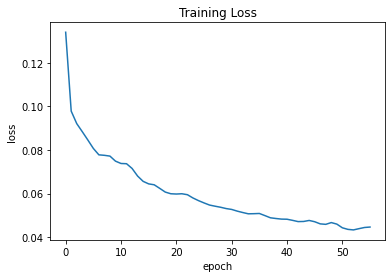

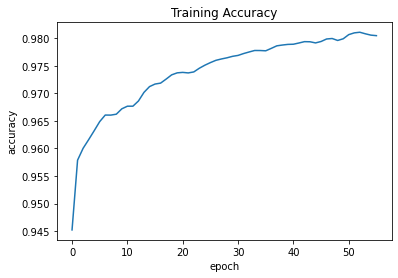

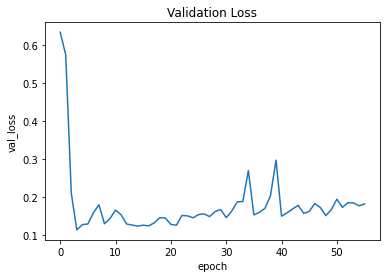

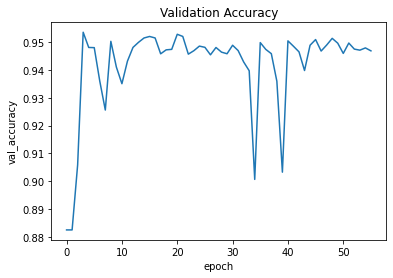

1/1 [==============================] - 1s 993ms/step


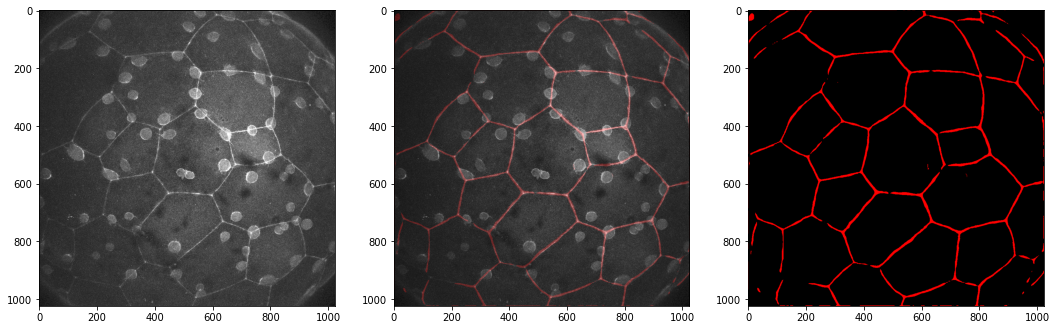

1/1 [==============================] - 0s 22ms/step


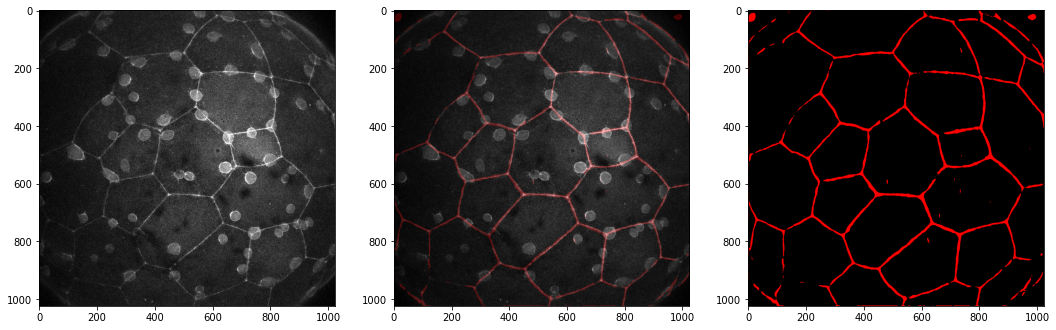

1/1 [==============================] - 0s 22ms/step


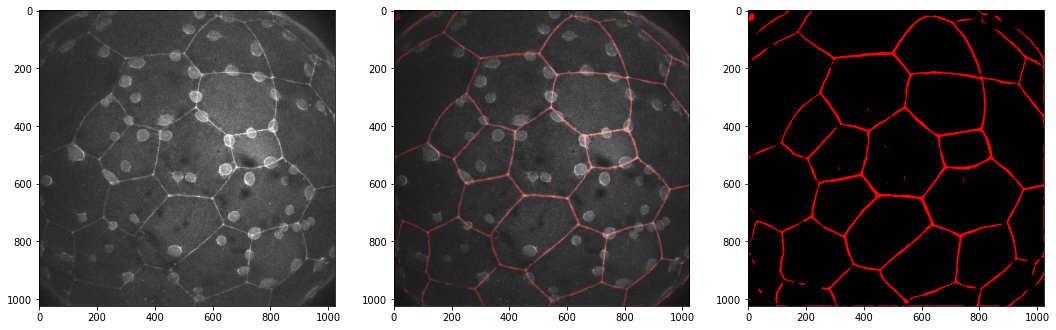

1/1 [==============================] - 0s 22ms/step


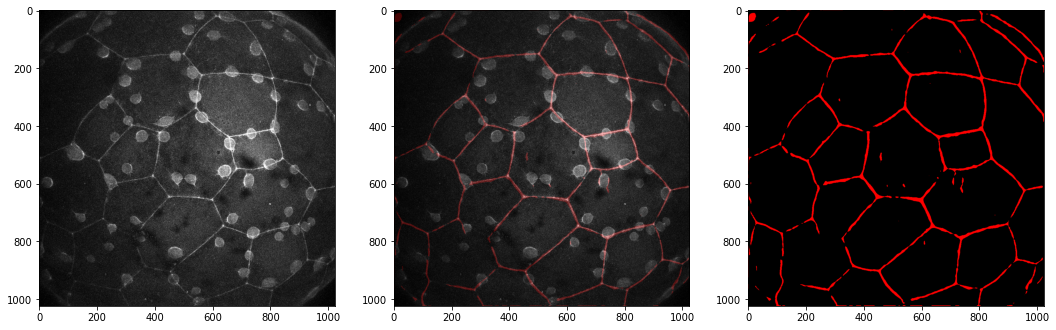

1/1 [==============================] - 0s 20ms/step
100
MIoU todo el data test:  77.32279896736145
MIoU solo de la primera imagen:  78.15401554107666
objeto_class_DeepLab.lst_predsSinArgmax0:  [[[[9.6696836e-01 3.3031646e-02]
   [9.6696836e-01 3.3031646e-02]
   [9.6408981e-01 3.5910219e-02]
   ...
   [9.0713894e-01 9.2861041e-02]
   [9.0810430e-01 9.1895700e-02]
   [9.0810430e-01 9.1895700e-02]]

  [[9.6696836e-01 3.3031646e-02]
   [9.6696836e-01 3.3031646e-02]
   [9.6408981e-01 3.5910219e-02]
   ...
   [9.0713894e-01 9.2861041e-02]
   [9.0810430e-01 9.1895700e-02]
   [9.0810430e-01 9.1895700e-02]]

  [[9.9483454e-01 5.1654615e-03]
   [9.9483454e-01 5.1654615e-03]
   [9.9388808e-01 6.1118919e-03]
   ...
   [9.1752708e-01 8.2472883e-02]
   [9.1274625e-01 8.7253764e-02]
   [9.1274625e-01 8.7253764e-02]]

  ...

  [[9.9732035e-01 2.6797021e-03]
   [9.9732035e-01 2.6797021e-03]
   [9.9867910e-01 1.3208354e-03]
   ...
   [9.8989141e-01 1.0108593e-02]
   [9.8544323e-01 1.4556818e-02]
   [9.8

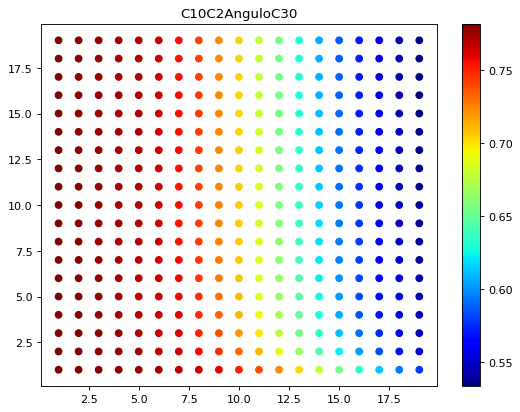

          miou
3610  0.781455


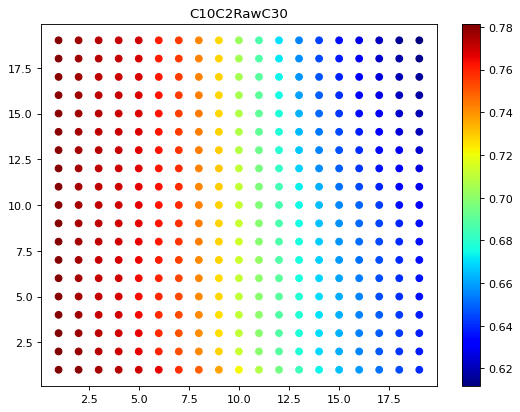

         miou
3249  0.78157


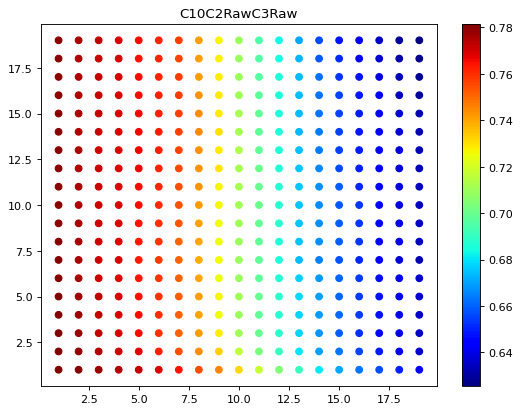

          miou
1786  0.785221


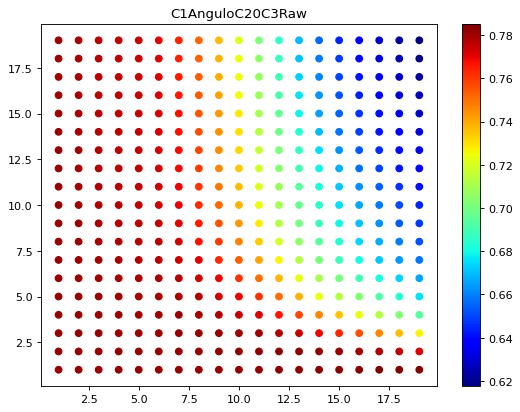

         miou
2166  0.78146


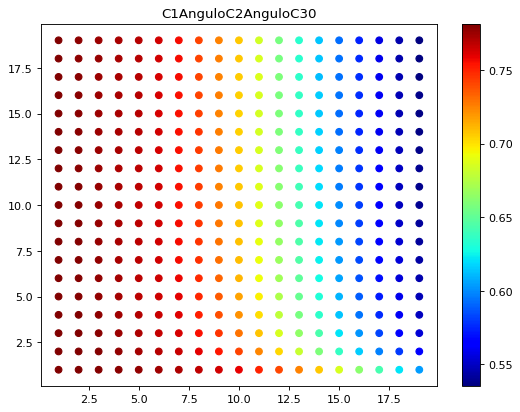

          miou
1806  0.781484


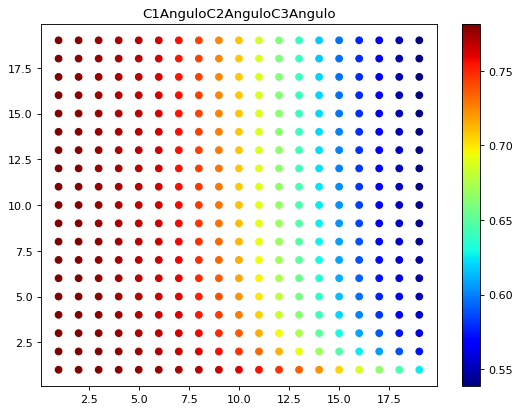

          miou
1064  0.784652


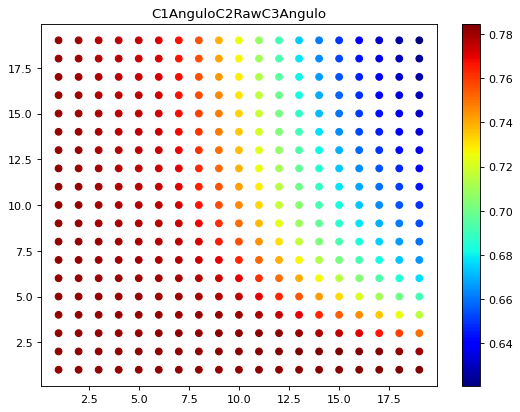

         miou
703  0.784662


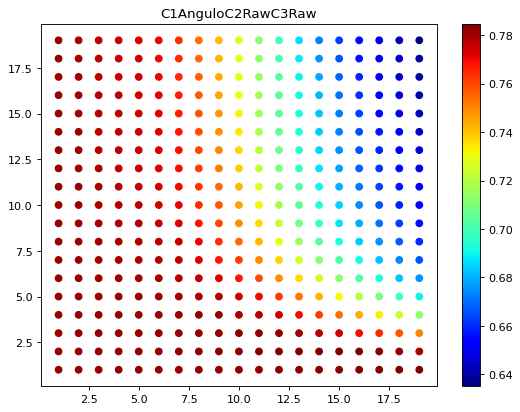

          miou
1407  0.785151


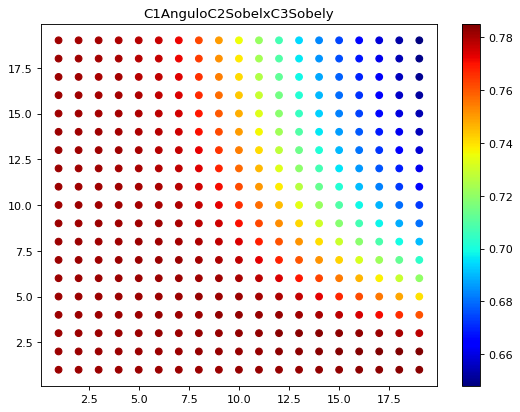

         miou
4335  0.78154


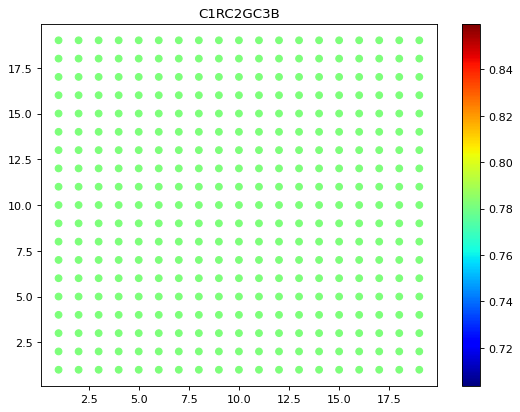

         miou
5053  0.78154


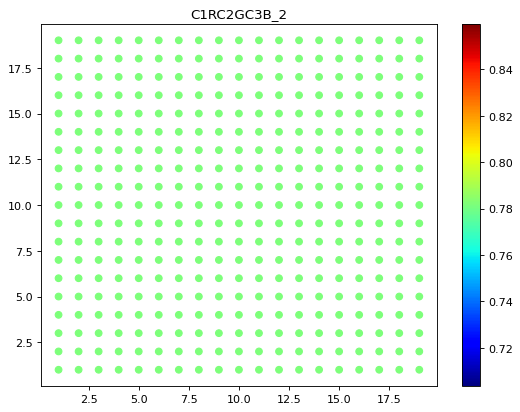

          miou
2888  0.781503


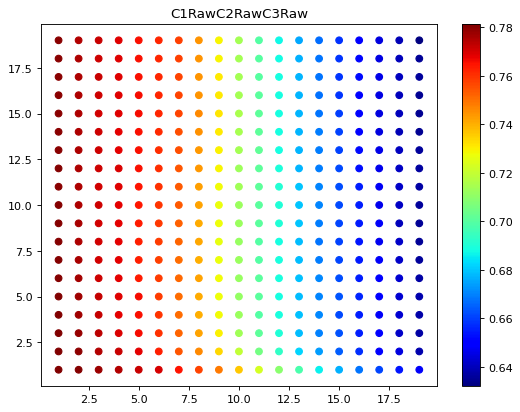

         miou
345  0.789182


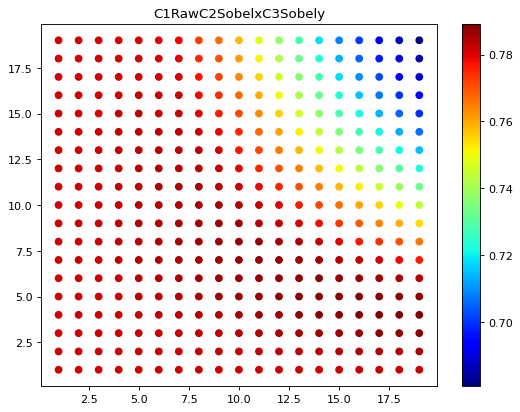

         miou
4306  0.78154


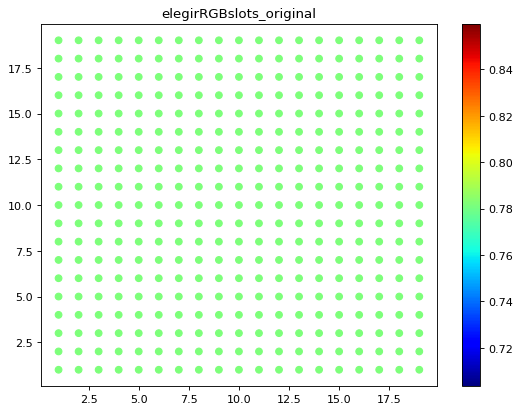

Fecha inicio:  20221119_1340 Fecha fin:  20221120_1250


In [23]:
func_PipelineDeeplabMasCRF3()

In [24]:
0/0

ZeroDivisionError: division by zero

In [ ]:
def func_PipelineDeeplabMasCRF4():
    
    from datetime import datetime as dt    
    str_fecha=dt.today().strftime('%Y%m%d_%H%M')
    nombreArchivoIn=dt.today().strftime('%Y%m%d_%H%M')+"pipeline.csv"
    
    objeto_class_class_CRF_OutputDatoseImagen2=CCRF()
    objeto_class_class_CRF_OutputDatoseImagen2(imagenUsar="usarEmbrion2Clases", 
                                 nombrearchivoIn=nombreArchivoIn, 
                                 MetodoRGBslots="MetodoRGBslots_original", 
                                 elegirRGBslots="elegirRGBslots_original", 
                                 influirSobelEnSmothnessKernel=False, 
                                 ParametroXY=5, 
                                 ParametroRGB=5, 
                                 probabilidades={"int_CC":0.7,"int_CI":0.3,"int_IC":0.45,"int_II":0.55}, 
                                 umbralFiltro="SinUmbral", 
                                 metodoConv=False, 
                                 k_conv=1, 
                                 metodoFranjas=False, 
                                 nfranjasRow=0, 
                                 nfranjasCol=0, 
                                 grosorFranja=0,
                                 metodoErosionar=False,
                                 kernelErosionar=2, 
                                 int_erosionIteraciones=1,
                                 inference=100,
                                 pairwisebilateralCompat=0,#Esto es lo importante aqui
                                 metodoDilatar=False,
                                 probmapTipo="probmapgeneradoOriginal",
                                 DCNNProbmap="asdasdadasda",#En esta config, no recibe probmap, se le crea uno, por eso se le pone cualquier cosa
                                 fecha=str_fecha)

In [ ]:
func_PipelineDeeplabMasCRF4()

In [ ]:
def func_DeeplabMasCRFPropuesto2Pipeline5():
    
    from datetime import datetime as dt    
    str_fecha=dt.today().strftime('%Y%m%d_%H%M')
    print(str_fecha)
    
    print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))
    objeto_class_DeepLab=CDLAB()

    image_sizeIn1=1024
    batch_sizeIn1=3
    num_classesIn1=2
    data_dirIn1=r"./COLAB_instance-level-human-parsing2/embryoDataset"
    num_train_imagesIn1=900
    num_val_imagesIn1=100
    num_test_imagesIn1=100 
    epocasIn1=100#200 es el ideal
                
    str_prefijoModel="embrion"+"B"+str(batch_sizeIn1)+"NC"+str(num_classesIn1)+"Tra"+str(num_train_imagesIn1)+"Val"+str(num_val_imagesIn1)+"Tes"+str(num_test_imagesIn1)+"Epo"+str(epocasIn1)
    
    DATA_DIR="./COLAB_instance-level-human-parsing2/instance-level_human_parsing/instance-level_human_parsing/Training"
    test_images = sorted(glob(os.path.join(DATA_DIR, r"video_animal2_proyeccion_SeqDA/*")))[
              1+ num_train_imagesIn1+ num_val_imagesIn1 : 1+ num_train_imagesIn1+ num_val_imagesIn1 + num_test_imagesIn1
            ]
    test_masks = sorted(glob(os.path.join(DATA_DIR, r"EVLstack_SeqDA/*")))[
              1+ num_train_imagesIn1+ num_val_imagesIn1 : 1+ num_train_imagesIn1+ num_val_imagesIn1 + num_test_imagesIn1
            ]
    
    
    primeraparte_DCNN=True
    mediaparte2=True
    segundaparte_CRF=True
    
    
    if (primeraparte_DCNN):
        objeto_class_DeepLab(image_sizeIn=image_sizeIn1, 
                             batch_sizeIn=batch_sizeIn1, 
                             num_classesIn=num_classesIn1,
                             data_dirIn=data_dirIn1,
                             num_train_imagesIn=num_train_imagesIn1, 
                             num_val_imagesIn=num_val_imagesIn1, 
                             num_test_imagesIn=num_test_imagesIn1, 
                             epocasIn=epocasIn1)


        new_model=objeto_class_DeepLab.model       
        print(r"objeto_class_DeepLab.lst_predsSinArgmax0: ", objeto_class_DeepLab.lst_predsSinArgmax0)
        lst_predsSinArgmax = new_model.lst_predsSinArgmax
        
        
    if (mediaparte2):#Este es para tener un dibujo para ver que tan bien quedo el modelo viendo una prediccion    
 
        #pathMio=r"./COLAB_instance-level-human-parsing2/embryoDataset/video_animal2_proyeccion_SeqDA/1OR0000.jpg"#Esta es solo para dibujar los probmaps puntuales para tener un feeling mejor del proceso
        
        DCNNProbmapIn=objeto_class_DeepLab.lst_predsSinArgmax0[0,:,:,:]

        
        arr1A=DCNNProbmapIn[:,:,0]#La clase background
        arr2A=DCNNProbmapIn[:,:,1]#La clase embrion
        
        pathProbmap=r"outputsMasivos/ImagenesTemporales/"+str_fecha+"Probmaps"+"/"
        os.mkdir(pathProbmap)
        
        
        DCNNProbmapIn_im1 = Image.fromarray((arr1A*255).astype(np.uint8))
        DCNNProbmapIn_im1.save(pathProbmap+"4Probmap0"+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".png")

        
        DCNNProbmapIn_im2 = Image.fromarray((arr2A*255).astype(np.uint8))
        DCNNProbmapIn_im2.save(pathProbmap+"4Probmap1"+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".png")

        
        np.savetxt((pathProbmap+"4Probmap0"+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".txt"), arr1A,fmt='%.2f', delimiter=',', newline='\n')
        np.savetxt((pathProbmap+"4Probmap1"+"func_PipelineDeeplabMasCRF"+str_prefijoModel+".txt"), arr2A,fmt='%.2f', delimiter=',', newline='\n')
    
    
    def func_listToImage(images_list):#ESTA TRANSFORMA FILENAMES EN IMAGENES
        output=[]
        for image_file in images_list:
            image_tensor = read_image(image_file)
            output.append(image_tensor)
        return(output)
        
    test_imagesIM=func_listToImage(test_images)
    
    if (False):
        print("listar test images")
        print("tratar a cada una de manera separada")
        print("a cada imagen pasarla por el modelo ya entrenado")
        print("con eso se tiene el probmap, falta la matriz de magnitud de kernels")
        print(" a cada imagen pasarla por una funcion que le de como output la matriz de magnitud de kernels para las 10 orientaciones")
        print(" a cada imagen pasarla por una funcion que le de como output una sola matriz de la orientacion promedio de zonas")
        print(" a cada imagen rotarla 10 veces")
        print(" a cada probmap rotarlo 10 veces")
        print("hacer un for para que:1° pasar una imagen, 2° predecir probmap, 3° obtener matriz de kernels para orientaciones, 4° obtener matriz de orientacion de zonas, 5° 10 orientaciones de imagen, 6° 10 orientaciones de probmap")
        print("para cada imagen hacer un for, en cada pasada se entrega como parametro una imagen rotada, el probmap rotado, la matriz de magnitud de kernels")
        print("considerar todas las orientaciones y usando la matriz de la orientacion promedio de zonas, construir el output final")
        print("seguir con la siguiente imagen")
        
    
        
    def func_rotarImagen(mat, angle):# Rota imagen
        """
        Rotates an image (angle in degrees) and expands image to avoid cropping
        """

        height, width = mat.shape[:2] # image shape has 3 dimensions
        image_center = (width/2, height/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

        rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

        # rotation calculates the cos and sin, taking absolutes of those.
        abs_cos = abs(rotation_mat[0,0]) 
        abs_sin = abs(rotation_mat[0,1])

        # find the new width and height bounds
        bound_w = int(height * abs_sin + width * abs_cos)
        bound_h = int(height * abs_cos + width * abs_sin)

        # subtract old image center (bringing image back to origo) and adding the new image center coordinates
        rotation_mat[0, 2] += bound_w/2 - image_center[0]
        rotation_mat[1, 2] += bound_h/2 - image_center[1]

        #rotation_mat2=rotation_mat.copy()
        #rotation_mat2[rotation_mat2>=0] = 0

        # rotate image with the new bounds and translated rotation matrix
        rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h), borderMode=cv2.BORDER_CONSTANT,
                               borderValue=(0,0,0))
        return rotated_mat
    
    
    def func_imagenEncima(img1, img2):#Pone imagen encima de otra
        l_img = img1
        #l_img = cv2.cvtColor(cv2.imread(img1), cv2.COLOR_BGR2RGB)
        
        #s_img = cv2.cvtColor(cv2.imread(img2), cv2.COLOR_BGR2RGB)
        s_img=img2


        centroL1=int(l_img.shape[0]/2)
        centroL2=int(l_img.shape[1]/2)

        centroS1=int(s_img.shape[0]/2)
        centroS2=int(s_img.shape[1]/2)

        #l_img = cv2.imread("hawai.jpg")
        x_offset=centroL2-centroS2
        y_offset=centroL1-centroS1

        l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

        output=Image.fromarray(l_img)
        print("l_img.shape: ",l_img.shape)

        plt.imshow(output)
        plt.show()
        return(output)

    
    def func_rotarYpegarenFondo(imgIn,predsSinArgmaxIn): #Por cada imagen saca 10 rotadas. Usa func_imagenEncima y rotate_image
        
        
        lst_angulos=[0,10,20,30,40,50,60,70,80,90]
        output10=[]
        for lst_angulos_i in lst_angulos:

            print("lst_angulos_i: ",lst_angulos_i)
            aux=func_imagenEncima("fondonegro.png", func_rotarImagen(imgIn,lst_angulos_i))
            output10.append(aux)            
            
        return (output10)

    
    def func_rotarArray():#Le pasan un array y lo rota
        import numpy as np
        from scipy.ndimage.interpolation import rotate

        x = np.random.randint(800, 1000, size=[100, 100, 3])
        rotated = rotate(x, angle=45)
        
        print("usar func_imagenEncima para ponerla sobre 0")
        return(rotated10)
        
        
        
    
    
    
    
    
    
    
    ####FUNCIONES PARA PREDECIR EL MODELO
    ####FUNCIONES PARA PREDECIR EL MODELO
    ####FUNCIONES PARA PREDECIR EL MODELO
    def infer(self, model, image_tensor):
        predictions = model.predict(np.expand_dims((image_tensor), axis=0))
        predictions = np.squeeze(predictions)
        predictions = np.argmax(predictions, axis=2)
        return predictions


    def decode_segmentation_masks(self, mask, colormap, n_classes):
        r = np.zeros_like(mask).astype(np.uint8)
        g = np.zeros_like(mask).astype(np.uint8)
        b = np.zeros_like(mask).astype(np.uint8)
        for l in range(0, n_classes):
            idx = mask == l
            r[idx] = colormap[l, 0]
            g[idx] = colormap[l, 1]
            b[idx] = colormap[l, 2]
        rgb = np.stack([r, g, b], axis=2)
        return rgb


    def get_overlay(self, image, colored_mask):
        image = tf.keras.preprocessing.image.array_to_img(image)
        image = np.array(image).astype(np.uint8)
        overlay = cv2.addWeighted(image, 0.35, colored_mask, 0.65, 0)
        return overlay


    def plot_samples_matplotlib(self, display_list, figsize=(5, 3)):
        _, axes = plt.subplots(nrows=1, ncols=len(display_list), figsize=figsize)
        for i in range(len(display_list)):
            if display_list[i].shape[-1] == 3:
                axes[i].imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
            else:
                axes[i].imshow(display_list[i])
        plt.show()


    def plot_predictions(self, images_list, colormap, model):
        for image_file in images_list:
            image_tensor = self.read_image(image_file)
            prediction_mask = self.infer(image_tensor=image_tensor, model=model)
            prediction_colormap = self.decode_segmentation_masks(prediction_mask, colormap, 20)
            overlay = self.get_overlay(image_tensor, prediction_colormap)
            self.plot_samples_matplotlib(
              [image_tensor, overlay, prediction_colormap], figsize=(18, 14)
            )
  

    def inferSinArgmax(self, model, image_tensor):
        predictions = model.predict(np.expand_dims((image_tensor), axis=0))
        return predictions

    def calc_predictionsVBSSinArgmax(self, images_list, model):#ESTA TRANSFORMA FILENAMES EN IMAGENES
        output=[]
        for image_file in images_list:
            image_tensor = self.read_image(image_file)
            prediction_mask = self.inferSinArgmax(image_tensor=image_tensor, model=model)
            output.append(prediction_mask)
        return(output)

    def calc_predictionsVBS(self, images_list, model):
        output=[]
        for image_file in images_list:
            image_tensor = self.read_image(image_file)
            prediction_mask = self.infer(image_tensor=image_tensor, model=model)
            output.append(prediction_mask)
        return(output)
          #prediction_colormap = decode_segmentation_masks(prediction_mask, colormap, 20)
          #overlay = get_overlay(image_tensor, prediction_colormap)
          #plot_samples_matplotlib(
          #    [image_tensor, overlay, prediction_colormap], figsize=(18, 14)
          #)


    def load_dataVBS(self, image_list, mask, to_tensor):
        output=[]
        for image_list_i in image_list:
            image = self.read_image(image_list_i, mask)
            output.append(image)

        #if(to_tensor==True):
        #    output=tf.convert_to_tensor(output)
        return output
    ####FUNCIONES PARA PREDECIR EL MODELO
    ####FUNCIONES PARA PREDECIR EL MODELO
    ####FUNCIONES PARA PREDECIR EL MODELO
    
    

    
    
    def func_aplicar_CRF_LibNueva(self, sobelsdx,sobelsdy, arrProbmap, ParametroXY, ParametroRGB, imgdef, inferenceIn, pairwisebilateralCompat):   
        #import cv2


        #sobelsdx, sobelsdy=self.func_influir_SobelEnSmothnessKernel(sobelsdx, sobelsdy, influirSobelEnSmothnessKernel)#Aca intervengo para cambiar valor de los sobels si es que no quiero que influyan en la libreria nueva al obtener self.img_RGBasignacion
        #print("juega colo colo parametroRGB:", ParametroRGB)
        #ParametroXY=(1,1)
        #ParametroXY=ParametroXY1
        #ParametroRGB=(5,5,5)
        #ParametroRGB=ParametroRGB1

        #Metodo1="Nuevo" #Valores Nuevo, Original

        #if (False):#MODIFICAR esto para comparar metodo original con el propuesto
        #    if(MetodoRGBslots=="Original"):
                #Ojo esto asi como esta escrito tiene mayor jerarquia que el parametro "configuracion".. Si configuracion dice anguloangulo0, pero metodo es original, entonces se hace con el original no mas
                ###USAR parametro rgbim de addPairwiseBilateral para meter imagenes como esta pensado originalmente
                #print("aca va original")
         #       img = cv2.imread(img_raw) #Tiene dimensiones alto(imagen) x ancho(imagen) x 3(RGB) #Esto es lo mismo que usar el caso rawrawraw. O sea en vez de poner Metodo=rawrawraw, mejor pone en configuraciones [Raw,Raw,Raw]
                #plt.imshow(img_raw)


          #  if(MetodoRGBslots=="Nuevo"):
                ###USAR parametro rgbim de addPairwiseBilateral para meter angulos que es una "propuesta nueva"
                #img = cv2.imread("angulos.png") #Tiene dimensiones alto(imagen) x ancho(imagen) x 3(RGB)   
           #     img=img_RGBasignacion

            #print("se podria corroborar dejar esto en False si rawrawraw da los mismos valores que Metodo==Original")

        img=imgdef
        #img=imgIn
        img = np.ascontiguousarray(img) #Tiene dimensiones alto x ancho x 3(RGB). Parece que es algo para acelerar el proceso. Ademas mantiene las dimensiones originales de img

        #img2=cv2.imread(r"combinadasout0.png") 
        #img2=cv2.imread(nombreArchivo) 
        img2=arrProbmap#En vez de leer una imagen para el probmap yo se lo construyo

        probmap = np.transpose(img2, (2, 0, 1))#Reacomodar las dimensiones
        probmap = probmap.copy(order='C') #Dimensiones: n_clases x alto(parametroFijado) x ancho(parametroFijado)

        #print("np.unique(img2)",np.unique(img2))
        #print(probmap.shape)
        #print(probmap.flags)

        n_classes, height, width = probmap.shape
        #print("n_classes",n_classes)

        #print("Este Codigo: unary = unary_from_softmax(probmap)")
        unary = unary_from_softmax(probmap) #Tiene dimensiones n_classes x (alto(parametroFijado)xancho(parametroFijado)). Una opción es hacer:-np.log(probs)
        #unary = np.ascontiguousarray(unary)    
        #print("unary", type(unary))    
        #print("unary",unary.shape)
        unary = unary.reshape((n_classes,-1)) #Tiene dimensiones n_classes x (alto(parametroFijado)xancho(parametroFijado))
        #print("unary", type(unary))    
        #print("unary",unary.shape)

        #print("Este Codigo: d = dcrf.DenseCRF2D(width, height, n_classes)")
        d = dcrf.DenseCRF2D(width, height, n_classes)# weight height labels
        #print("d", type(d))    
        #print("d",d.shape)

        #print("Este Codigo: d.setUnaryEnergy(unary)")
        d.setUnaryEnergy(unary) #d.setUnaryEnergy(-np.log(unary)) 
        #print("d", type(d))    
        #print("d",d.shape)


        #print("esto hay que cambiarlo para que sea el metodo original o el nuevo, especificamente se deben agregar los parametros angulo y angulo2 si se usa el metodo nuevo")
        #print("Este Codigo: d.addPairwiseGaussian(angulo=np.uint8(sobelsdx),angulo2=np.uint8(sobelsdy) ,sxy=(1,1), compat = 1)")
        #d.addPairwiseGaussian(angulo=np.uint8(sobelsdx),angulo2=np.uint8(sobelsdy) ,sxy=(1,1), compat = 1)#Este funciona con el original (20220214_lucasbeyer_pydensecrf_original)
        #d.addPairwiseGaussian(angulo=np.uint8([[0,1,2],[3,4,5]]),angulo2=np.uint8([[1,1],[1,1]]) ,sxy=(1,1), compat = 1)#Este funciona con el original (20220214_lucasbeyer_pydensecrf_original)
        #d.addPairwiseGaussian(sxy=(1,1), compat = 1)#Este funciona con el original (20220214_lucasbeyer_pydensecrf_original)
        #d.addPairwiseBilateral(angulo=np.uint8(sobelsdx),angulo2=np.uint8(sobelsdy),sxy=(1,1), srgb=5, rgbim=np.copy(img), compat=2)#Ojo que al 20220420 no le afecta los valores de sobelsdx y sobelsdy a addPairwiseBilateral (revisar codigo)
        #d.addPairwiseBilateral(angulo=np.uint8(sobelsdx),angulo2=np.uint8(sobelsdy),sxy=ParametroXY, srgb=ParametroRGB, rgbim=np.copy(img), compat=2)#Ojo que al 20220420 no le afecta los valores de sobelsdx y sobelsdy a addPairwiseBilateral (revisar codigo)
        #if(libreria=='20220506_lucasbeyer_pydensecrf_Original'):
            #for i in list(range(0,100)):
            #d.addPairwiseBilateral(sxy=ParametroXY, srgb=ParametroRGB, rgbim=np.copy(img), compat=2)#Ojo que al 20220420 no le afecta los valores de sobelsdx y sobelsdy a addPairwiseBilateral (revisar codigo)
            #d.addPairwiseBilateral(sxy=ParametroXY, srgb=ParametroRGB, rgbim=np.copy(img_RGBasignacion), compat=2)#Ojo que al 20220420 no le afecta los valores de sobelsdx y sobelsdy a addPairwiseBilateral (revisar codigo)


        #if(libreria=='20220211_lucasbeyer_pydensecrf'):
        d.addPairwiseBilateral(angulo=np.uint8(sobelsdx),angulo2=np.uint8(sobelsdy),sxy=ParametroXY, srgb=ParametroRGB, rgbim=np.copy(img), compat=pairwisebilateralCompat)
        #d.addPairwiseBilateral(angulo=np.uint8(sobelsdx),angulo2=np.uint8(sobelsdy),sxy=ParametroXY, srgb=ParametroRGB, rgbim=np.copy(img), compat=0)

        #print("Este Codigo: Q = d.inference(5)")
        Q = d.inference(inferenceIn) #Tipo: pydensecrf.eigen.MatrixXf

        #print("Este Codigo: Q = np.array(Q).reshape((n_classes, height, width))")
        Q = np.array(Q).reshape((n_classes, height, width)) #Dimensiones nclasses x alto x ancho
        #print(type(Q))
        #print(Q.shape)

        #print("Este Codigo: Q = np.transpose(Q, (1, 2, 0))")
        Q = np.transpose(Q, (1, 2, 0))
        #print("Si esta fuera de rango en el subindice en .cpp como que se inventa un numero y no tira error") 
        return(Q)
    
 
    

    
    
    
    
    
    colormap = loadmat(
    r"human_colormap.mat"
    )["colormap"]
    colormap = colormap * 100
    colormap = colormap.astype(np.uint8)

    self.plot_predictions(test_images[:4], colormap, model=self.model)

    lst_predsSinArgmax=self.calc_predictionsVBSSinArgmax(test_images, self.model)
    #print(lst_predsSinArgmax[0])

    test_masksIM = self.load_dataVBS(test_masks, mask=True, to_tensor=False)
    lst_preds=self.calc_predictionsVBS(test_images, self.model)        

    #print("test_images type: ", test_images)
    #print("test_images0 type: ", test_images0)


    self.lst_predsSinArgmax0=self.calc_predictionsVBSSinArgmax(test_images0, self.model)#es una lista por eso la modifico abajo     
    self.lst_predsSinArgmax0=self.lst_predsSinArgmax0[0]

    #print("test_images0 shape: ", self.lst_predsSinArgmax0.shape)
        
    #m = tf.keras.metrics.MeanIoU(num_classes=20)
    m = tf.keras.metrics.MeanIoU(num_classes=num_classesIn)
    i=0
    for lst_preds_i in lst_preds:             
        m.update_state(test_masksIM[i], lst_preds[i])            
        i+=1
    print(i)
    self.miou=m.result().numpy()*100
    print("MIoU: ",self.miou)
    
    
    

    str_fechaFin=dt.today().strftime('%Y%m%d_%H%M')
    print("Fecha inicio: ",str_fecha, "Fecha fin: ", str_fechaFin)

In [ ]:
#func_Pipeline_GenerarMapaPaper()
#func_Pipeline_GenerarMapaPaper_VariasConfigs()

In [ ]:
if False:
    pd.set_option('display.width', 200)
    pd.set_option('display.max_rows',10)
    pd.set_option('display.max_columns', 50)

    def display_full(x):
        pd.set_option('display.max_rows', len(x))
        pd.set_option('display.max_columns', x.shape[1])
        display(x)
        pd.set_option('display.max_rows',10)
        pd.set_option('display.max_columns', 50)
    def display_head1(x):
        pd.set_option('display.max_rows', 1)
        display(x)
        pd.set_option('display.max_rows',10)

In [ ]:
if False:
    df=pd.read_csv(r"outputsMasivos/"+namearchivo+r".csv", header=0, comment='#')
    df = df.sort_values(by=["miou"], ascending=[False] )

    df
    #display_full(df.head(20))
    #configs=np.unique().tolist()
    #configs

In [ ]:
if False:    
    import pandas as pd
    import numpy as np
    #20220612_1924_event
    #20220612_2155_event
    #20220613_0212_event
    #20220616_0141_event
    namearchivo="20220925_0339pipeline"
    df=pd.read_csv(r"outputsMasivos/"+namearchivo+r".csv", header=0, comment='#')
    df = df.sort_values(by=["miou"], ascending=[False] )
    #df.columns=['miou', 'configuracion', 'umbral', 'sxy', 'srgb', 'metodo', 'probmap', 'influirSobelEnSmothnessKernel']


    #configs=df["elegirRGBslots"]
    #df
    #if True:
    #configs=["C1RawC2RawC3Raw", "C1RawC2RawC3Angulo", "C1RawC2RawC30", "C1RawC20C30", "C10C2RawC30", "C10C20C3Raw",
    #                             "C1AnguloC2AnguloC3Angulo", "C1AnguloC2AnguloC3Raw", "C1AnguloC2AnguloC30", "C1AnguloC20C30", "C10C2AnguloC30", "C10C20C3Angulo",
    #                             "C1AnguloC2RawC30", "C1RawC2AnguloC30", "C1RawC20C3Angulo", "C1AnguloC20C3Raw"]

    #if False:
    #    lst_configuraciones=["C1RC2GC3B", "C1RC2GC3B_2", "C1RawC2RawC3Raw", 
    #                                 "C1RawC2SobelxC3Sobely", "C1RawC2SobelyC3Sobelx", "C1SobelxC2RawC3Sobely", "C1SobelxC2SobelyC3Raw", "C1SobelyC2SobelxC3Raw", "C1SobelyC2RawC3Sobelx",#
    #
    #                                 "C1RawC2RawC30", "C1RawC20C3Raw","C10C2RawC3Raw", 
    #                                 "C1RawC2RawC3Angulo","C1RawC2AnguloC3Raw","C1AnguloC2RawC3Raw",#
    #
    #                                 "C1AnguloC2AnguloC30","C1AnguloC20C3Angulo","C10C2AnguloC3Angulo",
    #                                 "C1AnguloC2AnguloC3Raw","C1AnguloC2RawC3Angulo","C1RawC2AnguloC3Angulo",
    #
    #                                 "C1RawC20C30", "C10C2RawC30", "C10C20C3Raw",
    #                                 "C1AnguloC20C30", "C10C2AnguloC30", "C10C20C3Angulo",
    #                                 ]
    lst_configuraciones=np.unique(df["elegirRGBslots"]).tolist()
    print(lst_configuraciones)    
    #lst_configuraciones=["C1AnguloC2RawC30"]
    #lst_configuraciones=["C1RawC2SobelxC3Sobely"]


    dfaux=df.copy()

    print(pd.DataFrame((df.groupby("elegirRGBslots")["miou"].max())).reset_index().sort_values(by=['miou'], ascending=False))

    for config_i in lst_configuraciones:

        dfaux = df[df["elegirRGBslots"]==config_i]
        print(dfaux.head(1)[["miou"]] )
        #print(dfaux.shape[0] )
        #dfaux = dfaux.sort_values(by=["miou"], ascending=[False] )
        dfaux = dfaux.reset_index(drop=True)


        dfaux["sxy1d"] = dfaux["ParametroXY"].str.extract('(?<=\()(.*?)(?=\,)').astype(int)
        dfaux["srgb1d"] = dfaux["ParametroRGB"].str.extract('(?<=\()(.*?)(?=\,)').astype(int)



        import matplotlib.pyplot as plt
        from matplotlib.pyplot import figure
        figure(figsize=(8, 6), dpi=80)
        plt.title(config_i)
        plt.scatter(dfaux["sxy1d"] , dfaux["srgb1d"] , c=dfaux["miou"],cmap="jet" )
        plt.colorbar()
        plt.show()

        #dfaux["miou"].head(1)


In [ ]:
if False:
    namearchivo="20220924_2308pipeline"
    df=pd.read_csv(r"outputsMasivos/"+namearchivo+r".csv", header=0, comment='#')

In [ ]:
#["C1RawC2RawC3Raw", "C1RawC2RawC3Angulo", "C1RawC2RawC30", "C1RawC20C30", "C10C2RawC30", "C10C20C3Raw",
#                             "C1AnguloC2AnguloC3Angulo", "C1AnguloC2AnguloC3Raw", "C1AnguloC2AnguloC30", "C1AnguloC20C30", "C10C2AnguloC30", "C10C20C3Angulo",
#                             "C1AnguloC2RawC30", "C1RawC2AnguloC30", "C1RawC20C3Angulo", "C1AnguloC20C3Raw"]

#df[df["elegirRGBslots"]=="C1RawC2RawC3Angulo"]

In [ ]:
if False:
    import re
    txt = "C1AnguloC2RawC30"
    C1 = re.search("(?<=C1)(.*)(?=C2)", txt)
    C2 = re.search("(?<=C1)(.*)(?=C2)", txt)
    C3 = re.search("(?<=C1)(.*)(?=C2)", txt)

    C1[0]

In [ ]:

#img_rawIM=np.array(Image.open(r"COLAB_instance-level-human-parsing2/embrion/secuencia/raw/embryoR-10000.png"))#imagen raw

In [ ]:
#!nvidia-smi -L




In [ ]:
if False:    
    lst_config=["C1RawC2SobelxC3Sobely",
                "C1AnguloC2RawC3Raw",
                "C1AnguloC2RawC3Angulo",
                "C1AnguloC2SobelxC3Sobely",
                "C1AnguloC20C3Raw",
                "C1AnguloC2AnguloC3Angulo",
                "C1AnguloC2AnguloC30",
                "C10C2AnguloC30",
                "C1RawC2RawC3Raw",
                "C10C2RawC3Raw",
                "C10C2RawC30",
               ]

    import pandas as pd
    import numpy as np
    #namearchivo="20220925_0339pipeline"
    df=pd.read_csv(r"outputsMasivos/"+"20221005_1422func_PipelineDeeplabMasCRFembrionB1NC2Tra120Val10Tes10Epo200.csv", header=0, comment='#')
    df = df.sort_values(by=["miou"], ascending=[False] )

    lst_configuraciones=np.unique(df["elegirRGBslots"]).tolist()
    print(lst_configuraciones)    

    #dfaux=df.copy()

    print(pd.DataFrame((df.groupby("elegirRGBslots")["miou"].max())).reset_index().sort_values(by=['miou'], ascending=False))

    for config_i in lst_configuraciones:

        dfaux = df[df["elegirRGBslots"]==config_i]
        print(dfaux.head(1)[["miou"]] )

        dfaux = dfaux.reset_index(drop=True)


        dfaux["sxy1d"] = dfaux["ParametroXY"].str.extract('(?<=\()(.*?)(?=\,)').astype(int)
        dfaux["srgb1d"] = dfaux["ParametroRGB"].str.extract('(?<=\()(.*?)(?=\,)').astype(int)



        import matplotlib.pyplot as plt
        from matplotlib.pyplot import figure
        figure(figsize=(8, 6), dpi=80)
        plt.title(config_i)
        plt.scatter(dfaux["sxy1d"] , dfaux["srgb1d"] , c=dfaux["miou"],cmap="jet" )
        plt.colorbar()
        plt.show()

In [ ]:
if False:
    import cv2
    img2=cv2.imread(r"./COLAB_instance-level-human-parsing2/embrion/secuencia/raw/embryoR-10144.png") 

In [ ]:
if False:
    from matplotlib import pyplot as plt
    #Show the image with matplotlib
    plt.imshow(img2)
    plt.show()